### 加州房價預測

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
'''
<特徵全名>

MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude
'''

housing = fetch_california_housing()
X = housing.data
y = housing.target
features = housing.feature_names
print(X.shape, y.shape)
print(features)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# Linear regression (多特徵)
'''
若要使用單一特徵，可以使用以下代碼:
diabetes_X = diabetes_X[:, np.newaxis, 2] (代表取每個array的第二個特徵)
'''
### LinearRegression objects
reg = LinearRegression()
### Train
reg.fit(X=X_train, y=y_train)
### Predict testing data
predictions = reg.predict(X=X_test)

In [5]:
# The coefficients
"""了解每個特徵此模型中對於結果的影響"""
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [ 4.44870466e-01  9.55004561e-03 -1.21991503e-01  7.79144696e-01
 -7.68990809e-08 -3.29948505e-03 -4.19131153e-01 -4.34103468e-01]


In [6]:
df = pd.DataFrame({"features": features, "coef": reg.coef_})
df

,features,coef
0,MedInc,4.448705e-01
1,HouseAge,9.550046e-03
2,AveRooms,-1.219915e-01
3,AveBedrms,7.791447e-01
4,Population,-7.689908e-08
5,AveOccup,-3.299485e-03
6,Latitude,-4.191312e-01
7,Longitude,-4.341035e-01


In [7]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_true=y_test, y_pred=predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_true=y_test, y_pred=predictions))

Mean squared error: 0.54
Coefficient of determination: 0.60


#### 線性回歸模型結果報告

**1. 模型概述**

我們使用線性回歸模型來預測加州房價(每單位100,000美元)，並且對數據中的8個特徵進行分析。模型的目標是利用8種特徵來預測房價，並通過係數來衡量每個特徵對於預測結果的影響。

**2. 模型性能**
- **MSE** : 0.54

MSE表示模型預測值與實際值之間的平均誤差，值越低，表示模型的預測越準確。

- **Coefficient of Determination**: 0.60

R squared 表示模型能夠解釋目標變量變異的比例，也就是說此模型只能解釋60%的變異性，但仍有40%的變異型未能被捕捉到。

**3. 特徵與係數**

- 正係數: MedInc, HouseAge, AveBedrms 的係數為正，表示這些特徵值的增加會使目標變量增加。
- 負係數：AveRooms, Population, AveOccup, Latitude, Longitude 的係數為負，表示這些特徵值的增加會使目標變量減少。

**4. 模型解釋**
- AveBedrms 在所有係數中對於預測結果影響最大(0.779)，表示每間房子平均所擁有的臥室數量變量有較強的正相關影響。
- Latitude, Longitude 的係數皆為負數，表示地理位置在模型中對目標變量有一定的負面影響。

**5. 結論**

此線性回歸模型能夠解釋約 60% 的數據變異性，雖然具有一定的預測能力，但仍存在改善空間。對於特徵的分析顯示了哪些因素對預測結果有重要影響，也是可以優化模型可以參考的方向。

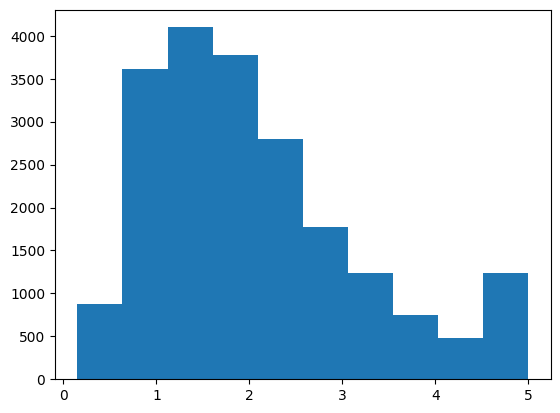

In [14]:
# Housing price 直方圖
fig, ax = plt.subplots()

n, bins, patches = ax.hist(y)
plt.show()

In [18]:
# Housing price 次數分佈表
for i, num in enumerate(n):
    print('{:.2f} - {:.2f}: {}'.format(bins[i], bins[i+1], num))

0.15 - 0.63: 877.0
0.63 - 1.12: 3612.0
1.12 - 1.60: 4099.0
1.60 - 2.09: 3771.0
2.09 - 2.57: 2799.0
2.57 - 3.06: 1769.0
3.06 - 3.55: 1239.0
3.55 - 4.03: 752.0
4.03 - 4.52: 479.0
4.52 - 5.00: 1243.0


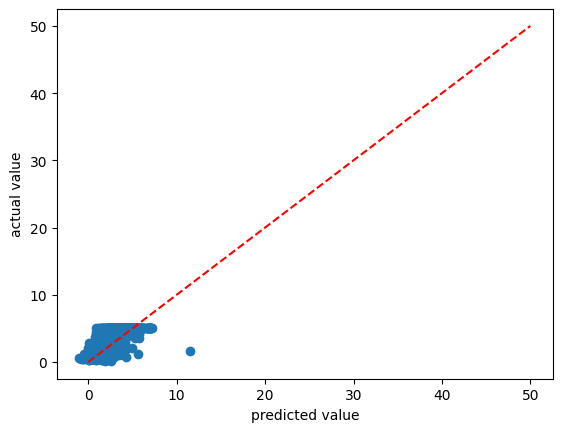

In [8]:
# 畫出預測值與實際值的散布圖
fig, ax= plt.subplots()
ax.scatter(x=predictions, y=y_test)
ax.plot((0,50), (0,50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

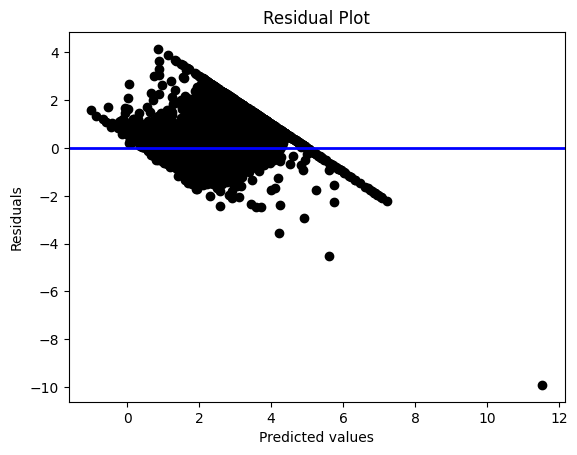

In [9]:
# 計算殘差
residuals = y_test - predictions

# 繪製殘差圖
fig, ax= plt.subplots()
ax.scatter(predictions, residuals, color="black")
ax.axhline(y=0, color="blue", linewidth=2)

ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot")
plt.show()

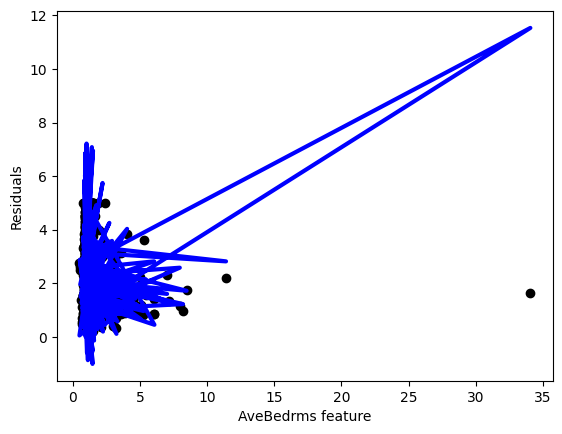

In [10]:
# 取第三個特徵來畫圖，可以用reshape來轉換array格式到每個樣本只有一個特徵
fig, ax= plt.subplots()
ax.scatter(X_test[:, 3].reshape(-1,1), y_test, color="black")
ax.plot(X_test[:, 3].reshape(-1,1), predictions, color="blue", linewidth=3)
ax.set_xlabel("AveBedrms feature")
ax.set_ylabel("Residuals")

plt.show()